#Fraud Detection




Data Cleaning

In [ ]:
import pandas as pd #To work with dataset


import os

import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest
#from tensorflow.keras.layers import Input, Dense
#from tensorflow.keras.models import Model, Sequential
#from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support, mean_squared_error, recall_score
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df_credit = pd.read_csv("/content/sample_data/creditcardcsvpresent.csv")   #sample dataset from Kaggle
df_credit.head(50)

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.000000,3000.000000,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.000000,4300.000000,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.500000,4823.000000,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.500000,5008.500000,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.000000,26000.000000,N,0,Y,Y,800,677.2,6,Y
5,3160241992,NaN,500.000000,27000.000000,N,0,Y,Y,800,677.2,6,Y
6,3160272997,NaN,262.500000,11287.500000,N,0,N,N,900,345.5,7,Y
7,3162041996,NaN,185.500000,11130.000000,Y,20,N,N,0,0.0,0,Y
8,3162041996,NaN,185.500000,6121.500000,Y,20,N,N,0,0.0,0,Y
9,3162041996,NaN,185.500000,7049.000000,Y,20,N,N,0,0.0,0,Y


In [ ]:
df_credit.Transaction_amount = df_credit.Transaction_amount.astype(int)  #Converting to int
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   int64  
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(3), int64(5), object(4)

Diffrential Privacy Lib by IBM

In [ ]:
!pip install diffprivlib          #installing diffrential privacy lib by IBM      

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_credit.Transaction_amount = df_credit.Transaction_amount.astype(int)

In [ ]:
import random
from diffprivlib.mechanisms import Exponential

exp_dataset = df_credit.copy()
sensitivity = 3
epsilon = 0.3
utility = [random.randint(0,1) for x in range(len(exp_dataset['Transaction_amount']))]      #Adding noise to Professional field
candidates = exp_dataset['Transaction_amount'].values.tolist()

mechanism = Exponential(
    sensitivity=sensitivity,
    epsilon=epsilon,
    utility=utility,
    candidates=candidates
)

exp_dataset['Transaction_amount'] = [mechanism.randomise() for _ in range(len(exp_dataset['Transaction_amount']))]
exp_dataset.head(10)                #Dataset formed through Exponential module


,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,80000,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,2948,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,22500,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,7349,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,2157,N,0,Y,Y,800,677.2,6,Y
5,3160241992,NaN,500.0,2813,N,0,Y,Y,800,677.2,6,Y
6,3160272997,NaN,262.5,5811,N,0,N,N,900,345.5,7,Y
7,3162041996,NaN,185.5,18950,Y,20,N,N,0,0.0,0,Y
8,3162041996,NaN,185.5,7998,Y,20,N,N,0,0.0,0,Y
9,3162041996,NaN,185.5,42395,Y,20,N,N,0,0.0,0,Y


In [ ]:
df_graph=pd.concat([df_credit['Transaction_amount'], exp_dataset['Transaction_amount']],axis=1, keys=['Original_df','expo_dataset'])   #Comparing age col from both datasets
df_graph.head(10)
df1=df_graph.head(50)


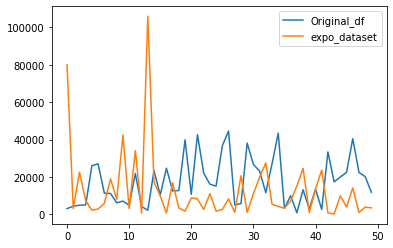

In [ ]:
df1.plot.line()  #Comparing original amt to new amt

In [ ]:
from diffprivlib.mechanisms import LaplaceTruncated             #importing Laplace Truncated library
import random
sensitivity=3
epsilon=0.005
mechanism = LaplaceTruncated(sensitivity=sensitivity, epsilon=epsilon, lower=0, upper=1000) 
laplace_dataset = exp_dataset.copy()
laplace_dataset['Daily_chargeback_avg_amt'] = [mechanism.randomise(laplace_dataset['Daily_chargeback_avg_amt'][x]) for x in laplace_dataset['Daily_chargeback_avg_amt']]
laplace_dataset.Daily_chargeback_avg_amt =laplace_dataset.Daily_chargeback_avg_amt.astype(int)
laplace_dataset.head(30)  

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.000000,80000,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.000000,2948,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.500000,22500,Y,5,N,N,119,0.0,0,Y
3,3160141996,NaN,185.500000,7349,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.000000,2157,N,0,Y,Y,0,677.2,6,Y
5,3160241992,NaN,500.000000,2813,N,0,Y,Y,315,677.2,6,Y
6,3160272997,NaN,262.500000,5811,N,0,N,N,261,345.5,7,Y
7,3162041996,NaN,185.500000,18950,Y,20,N,N,125,0.0,0,Y
8,3162041996,NaN,185.500000,7998,Y,20,N,N,28,0.0,0,Y
9,3162041996,NaN,185.500000,42395,Y,20,N,N,0,0.0,0,Y


In [ ]:
df_graph=pd.concat([df_credit['Daily_chargeback_avg_amt'], laplace_dataset['Daily_chargeback_avg_amt']],axis=1, keys=['Original_df','laplace_dataset'])   #Comparing age col from both datasets
df_graph.head(10)
df1=df_graph.head(50)

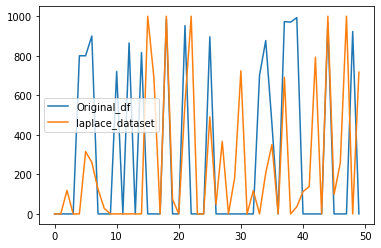

In [ ]:
df1.plot.line() #Comparing original db to new one

ML Training


In [ ]:
# Read training and test data
processed_data_dir = 'data'
X_train_path = os.path.join(processed_data_dir, 'X_train.csv')
y_train_path = os.path.join(processed_data_dir, 'y_train.csv')
X_test_path = os.path.join(processed_data_dir, 'X_test.csv')
y_test_path = os.path.join(processed_data_dir, 'y_test.csv')

#Imporing files for ml training
X_train = pd.read_csv("/content/sample_data/X_train.csv")
y_train = pd.read_csv("/content/sample_data/y_train.csv")
X_test = pd.read_csv("/content/sample_data/X_test.csv")
y_test = pd.read_csv("/content/sample_data/y_test.csv")



In [ ]:
# Create a results dataframe to store and later compare results
results = pd.DataFrame()
results['Metrics'] = ['True Negatives', 'False Negatives', 'False Positives', 'True Positives', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Support']

def get_metrics(labels, pred_labels):
    conf_matrix = np.asarray(confusion_matrix(labels, pred_labels))
    metrics = np.concatenate(([accuracy_score(labels, pred_labels)], precision_recall_fscore_support(labels, pred_labels, average='binary')))
    return np.concatenate((conf_matrix.reshape(-1),metrics))

def fit_model(input_data, model_fn, model_args=None, threshold=None, labels=None):
    return model_fn(input_data, model_args, threshold, labels)

def predict_model(input_data, model, predict_fn, threshold=None):
    return predict_fn(input_data, model, threshold)


#Isolation Forest


In [ ]:
def fit_isolation_forest(input_data, args=None, threshold=None, labels=None):
    if threshold == None:
        model = IsolationForest()
    else:
        model = IsolationForest(contamination=threshold)
    
    model.fit(input_data)

    return model

def predict_isolation_forest(input_data, model, threshold=None):
    y_pred = model.predict(input_data)
    y_pred = [1 if pred == -1 else 0 for pred in y_pred]

    return y_pred

In [ ]:
if_model = fit_model(X_train, fit_isolation_forest, None)

y_pred_test = predict_model(X_test, if_model, predict_isolation_forest)
print('CONFUSION MATRIX:\n', confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))


CONFUSION MATRIX:
 [[497  28]
 [  6  84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       525
           1       0.75      0.93      0.83        90

    accuracy                           0.94       615
   macro avg       0.87      0.94      0.90       615
weighted avg       0.95      0.94      0.95       615



In [ ]:
import sklearn

In [ ]:
isolation_accuracy=sklearn.metrics.accuracy_score(y_test, y_pred_test,  normalize=True, sample_weight=None)

In [ ]:
results['Isolation Forest'] = get_metrics(y_test, y_pred_test)

1) This suggests that precision of Isolation forest is 0.94 % when compared with the trained model

2) It is the most effective method when distribution of features cannot be assumed


# Diffprivlib existing Models

Gausian NB

In [ ]:
from diffprivlib.models.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(accountant=BudgetAccountant(spent_budget=[(1.0, 0), (1.0, 0), (1, 0), (1.0, 0), (1.0, 0), ...]),
           bounds=(array([4.35614842, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ]),
                   array([2.00e+03, 1.08e+05, 1.00e+00, 2.00e+01, 1.00e+00, 1.00e+00,
       9.98e+02, 9.98e+02, 9.00e+00])))

In [ ]:
gnb_pred=gnb.predict(X_test)

In [ ]:
print("Test accuracy: %f" % gnb.score(X_test, y_test))

print(classification_report(y_test, gnb_pred, target_names=['Not Fraud','Fraud']))

Test accuracy: 0.936585
              precision    recall  f1-score   support

   Not Fraud       0.96      0.97      0.96       525
       Fraud       0.79      0.77      0.78        90

    accuracy                           0.94       615
   macro avg       0.88      0.87      0.87       615
weighted avg       0.94      0.94      0.94       615



In [ ]:
gaussian_accuracy=sklearn.metrics.accuracy_score(y_test, gnb_pred,  normalize=True, sample_weight=None)
gaussian_accuracy

0.9365853658536586

In [ ]:
results['Gaussian NB'] = get_metrics(y_test, gnb_pred)

Random Forest

In [ ]:
from sklearn.datasets import make_classification
from diffprivlib.models import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/diffprivlib/models/forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
/usr/local/lib/python3.8/dist-packages/diffprivlib/models/forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify the prediction classes for model.
  warnings.warn("Classes have not been specified and will be calculated on the data provided. This will "


RandomForestClassifier(accountant=BudgetAccountant(spent_budget=[(1.0, 0), (1.0, 0)]),
                       bounds=(array([4.35614824, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ]),
                               array([2.00e+03, 1.08e+05, 1.00e+00, 2.00e+01, 1.00e+00, 1.00e+00,
       9.98e+02, 9.98e+02, 9.00e+00])),
                       classes=array([0, 1]))

In [ ]:
rfc_pred=rfc.predict(X_test)

In [ ]:
print("Test accuracy: %f" % rfc.score(X_test, y_test))
print(classification_report(y_test, rfc_pred, target_names=['Not Fraud','Fraud']))

Test accuracy: 0.876423
              precision    recall  f1-score   support

   Not Fraud       0.87      1.00      0.93       525
       Fraud       1.00      0.16      0.27        90

    accuracy                           0.88       615
   macro avg       0.94      0.58      0.60       615
weighted avg       0.89      0.88      0.84       615



In [ ]:
rfc_accuracy=sklearn.metrics.accuracy_score(y_test, rfc_pred,  normalize=True, sample_weight=None)
rfc_accuracy

0.8764227642276423

In [ ]:
results['Random Forest'] = get_metrics(y_test, rfc_pred)

Decision Tree

In [ ]:
from diffprivlib.models import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/diffprivlib/models/forest.py:419: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
/usr/local/lib/python3.8/dist-packages/diffprivlib/models/forest.py:427: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify the prediction classes for model.
  warnings.warn("Classes have not been specified and will be calculated on the data provided. This will "


DecisionTreeClassifier(accountant=BudgetAccountant(spent_budget=[(1.0, 0), (1.0, 0), (1, 0)]),
                       bounds=(array([4.35614842, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ]),
                               array([2.00e+03, 1.08e+05, 1.00e+00, 2.00e+01, 1.00e+00, 1.00e+00,
       9.98e+02, 9.98e+02, 9.00e+00])),
                       classes=array([0, 1]))

In [ ]:
dtc_pred=dtc.predict(X_test)

In [ ]:
print("Test accuracy: %f" % dtc.score(X_test, y_test))
print(classification_report(y_test, dtc_pred, target_names=['Not Fraud','Fraud']))

Test accuracy: 0.884553
              precision    recall  f1-score   support

   Not Fraud       0.90      0.98      0.94       525
       Fraud       0.73      0.33      0.46        90

    accuracy                           0.88       615
   macro avg       0.81      0.66      0.70       615
weighted avg       0.87      0.88      0.87       615



In [ ]:
dtc_accuracy=sklearn.metrics.accuracy_score(y_test, dtc_pred,  normalize=True, sample_weight=None)
dtc_accuracy

0.8845528455284553

In [ ]:
results['Decision Tree'] = get_metrics(y_test, dtc_pred)

Logistic Regression

In [ ]:
from diffprivlib.models import LogisticRegression

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


LogisticRegression(accountant=BudgetAccountant(spent_budget=[(1.0, 0), (1.0, 0), (1, 0), (1.0, 0)]),
                   data_norm=108022.73279731447)

In [ ]:
logistic_pred=logistic.predict(X_test)

In [ ]:
print("Test accuracy: %f" % logistic.score(X_test, y_test))
print(classification_report(y_test, logistic_pred, target_names=['Not Fraud','Fraud']))

Test accuracy: 0.460163
              precision    recall  f1-score   support

   Not Fraud       0.81      0.48      0.60       525
       Fraud       0.11      0.37      0.17        90

    accuracy                           0.46       615
   macro avg       0.46      0.42      0.38       615
weighted avg       0.71      0.46      0.54       615



In [ ]:
logistic_accuracy=sklearn.metrics.accuracy_score(y_test, logistic_pred,  normalize=True, sample_weight=None)
logistic_accuracy

0.46016260162601624

In [ ]:
results['Logistic Regression'] = get_metrics(y_test, logistic_pred)

In [ ]:
accuracy_array=[isolation_accuracy,rfc_accuracy,gaussian_accuracy,dtc_accuracy,logistic_accuracy]
accuracy_array

[0.9382113821138212,
 0.8764227642276423,
 0.9365853658536586,
 0.8845528455284553,
 0.46016260162601624]

In [ ]:
results

,Metrics,Isolation Forest,Gaussian NB,Random Forest,Decision Tree,Logistic Regression
0,True Negatives,492,507,525,514,250
1,False Negatives,33,18,0,11,275
2,False Positives,5,21,76,60,57
3,True Positives,85,69,14,30,33
4,Accuracy,0.938211,0.936585,0.876423,0.884553,0.460163
5,Precision,0.720339,0.793103,1.0,0.731707,0.107143
6,Recall,0.944444,0.766667,0.155556,0.333333,0.366667
7,F1-Score,0.817308,0.779661,0.269231,0.458015,0.165829
8,Support,None,None,None,None,None


In [ ]:
models=['isolation','random_forest','gaussian','decision_tree', 'logistic_regression']

In [ ]:
import matplotlib.pyplot as plt
 

<BarContainer object of 5 artists>

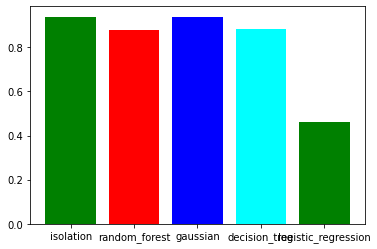

In [ ]:
plt.bar(models,accuracy_array, color=[ 'green', 'red', 'blue', 'cyan'])

/usr/local/lib/python3.8/dist-packages/diffprivlib/tools/histograms.py:137: PrivacyLeakWarning: Range parameter has not been specified. Falling back to taking range from the data.
To ensure differential privacy, and no additional privacy leakage, the range must be specified independently of the data (i.e., using domain knowledge).
  warnings.warn("Range parameter has not been specified. Falling back to taking range from the data.\n"


<BarContainer object of 5 artists>

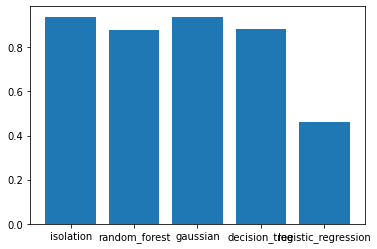

In [ ]:
from diffprivlib.tools.histograms import histogram
from diffprivlib import tools as dp
dp_hist, dp_bins = dp.histogram(accuracy_array)
plt.bar(models,accuracy_array)

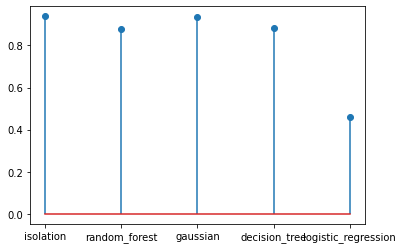

In [ ]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
  
x = models
y = accuracy_array
  
plt.stem(x, y, use_line_collection = True)
plt.show()

# Testing

In [ ]:
%%file test_file_load.py

import pytest
import pandas as pd
import logging
logging.basicConfig(level=logging.INFO)


def load_csv(filepath):
  try:
    df= pd.read_csv(filepath)
    if len(df)>0:
    # Do something if 
      logging.info(" Succesffully loaded file")
      return 1
      
  except FileNotFoundError:
      # File doesn't exist
      logging.info(" File not found/ Incorrect file path")
      return 2

  else:
    # Return error loading file
    logging.info(" File load failed")
    return 3
  

class TestFileloader:   
  def testthis(self):
    status  = load_csv("/content/sample_data/creditcardcsvpresent.csv")
    assert status ==1

  def testthis2(self):
    status  = load_csv("hello.csv")
    assert status ==1

  def testthis3(self):
    status  = load_csv("abc.txt")
    assert status ==1


Writing test_file_load.py


In [ ]:
!pip install whitebox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 3.3 MB/s 


In [ ]:
import whitebox
wbt = whitebox.WhiteboxTools()

Decompressing WhiteboxTools_linux_amd64.zip ...
WhiteboxTools package directory: /usr/local/lib/python3.8/dist-packages/whitebox


In [ ]:
import unittest

In [ ]:
class FraudDetect:
    def __init__(self):
        pass

    def Fraud(self, a, b):
        return "Y"

    def notFraud(self, a, b):
        return "N"


In [ ]:
class TestFraud(unittest.TestCase):
  
    def test_Fraud(self):
        '''Test case function for Fraud'''
        self.calc = FraudDetect()
        result = self.calc.Fraud(17857, "N")
        expected = "Y"
        self.assertEqual(result, expected)

    def test_notFraud(self):
        '''Test case function for not a Fraud'''
        self.calc = FraudDetect()
        result = self.calc.notFraud(5008, "Y")
        expected = "N"
        self.assertEqual(result, expected)

In [ ]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_Fraud (__main__.TestCalculator)
Test case function for Fraud ... ok
test_notFraud (__main__.TestCalculator)
Test case function for not a Fraud ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.009s

OK
